In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from mbench.intervention.efficacy import Converter
from mbench.util import np_looper

import matplotlib.pyplot as plt

In [5]:
converter = Converter(verbose=True)
x = np.linspace(0, 1, 300)

Text(0, 0.5, 'mortality pyrethroid bioassay')

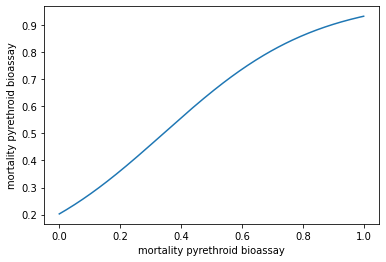

In [6]:
mortality_pyrethroid_hut_trail = np_looper(converter.mortality_bioassay_to_hut_trail, x)

plt.plot(x, mortality_pyrethroid_hut_trail)
plt.xlabel("mortality pyrethroid bioassay")
plt.ylabel("mortality pyrethroid bioassay")

Text(0, 0.5, 'mortality PBO bioassay')

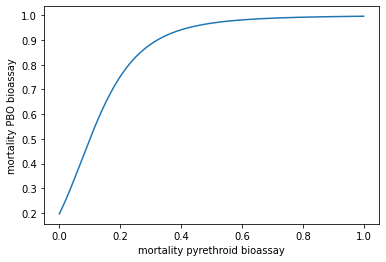

In [7]:
mortality_pbo_bioassay = np_looper(converter.mortality_pbo_bioassay, x)

plt.plot(x, mortality_pbo_bioassay)
plt.xlabel("mortality pyrethroid bioassay")
plt.ylabel("mortality PBO bioassay")


Text(0, 0.5, 'mortality pbo hut trail')

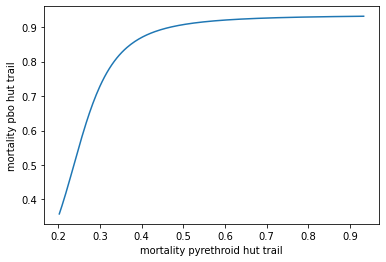

In [8]:
mortality_pbo_hut_trail = np_looper(
    converter.mortality_bioassay_to_hut_trail,
    mortality_pbo_bioassay
)
plt.plot(mortality_pyrethroid_hut_trail, mortality_pbo_hut_trail)
plt.xlabel("mortality pyrethroid hut trail")
plt.ylabel("mortality pbo hut trail")

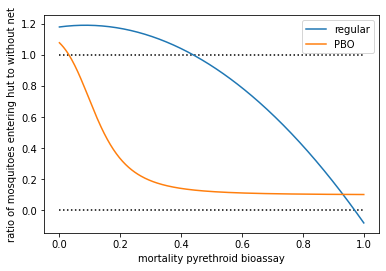

In [9]:
p_entering_regular_ratio = np_looper(
    converter.ratio_of_mosquitoes_entering_hut_to_without_net,
    x
)

p_entering_pbo_ratio = np_looper(
    converter.ratio_of_mosquitoes_entering_hut_to_without_net,
    mortality_pbo_hut_trail
)

plt.plot(x, p_entering_regular_ratio)
plt.plot(x, p_entering_pbo_ratio)
plt.xlabel("mortality pyrethroid bioassay")
plt.ylabel("ratio of mosquitoes entering hut to without net")
plt.legend(
    labels=['regular', 'PBO'],
    loc='best'
)
plt.hlines(1.0, 0, 1, colors='k', linestyles='dotted')
plt.hlines(0.0, 0, 1, colors='k', linestyles='dotted')
plt.show()

In [10]:
r10 = []
r11 = []
d10 = []
f10 = []
r20 = []
r21 = []
d20 =[]
f20 = []
for _ in np.nditer(x):
    ((_r10, _r11, _d10, _f10), (_r20, _r21, _d20, _f20), *others) = converter.bioassay_to_rds(_)
    r10.append(_r10)
    r11.append(_r11)
    d10.append(_d10)
    f10.append(_f10)
    r20.append(_r20)
    r21.append(_r21)
    d20.append(_d20)
    f20.append(_f20)

r10 = np.array(r10)
r11 = np.array(r11)
d10 = np.array(d10)
f10 = np.array(f10)
r20 = np.array(r20)
r21 = np.array(r21)
d20 = np.array(d20)
f20 = np.array(f20)
# ((r10, r11, d10, f10), (r20, r21, d20, f20)) = ((1,2,3,4),(1,2,3,4))


Text(0.5, 1.0, 'Relationships between Mortality in pyrethroid bioassay and efficacy in pyrethroid hut trial')

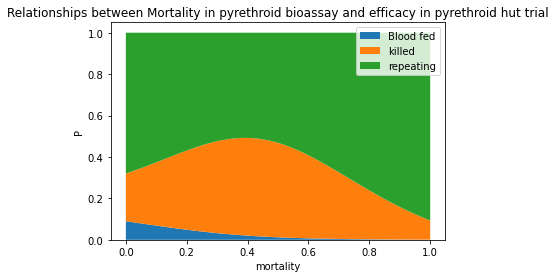

In [11]:
plt.stackplot(x, f10, d10, r10, labels=['f','d','r'])
plt.xlabel('mortality')
plt.ylabel('P')
plt.legend(['Blood fed','killed', 'repeating'])
plt.title('Relationships between Mortality in pyrethroid bioassay and efficacy in pyrethroid hut trial')

Text(0.5, 1.0, 'Relationships between Mortality in pyrethroid bioassay and efficacy in PBO hut trial')

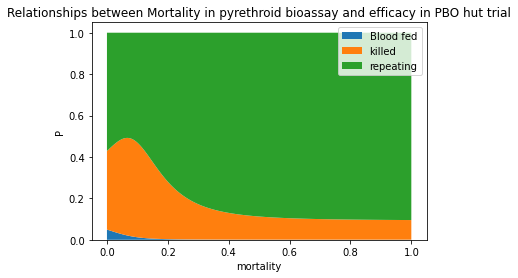

In [12]:
plt.stackplot(x, f20, d20, r20, labels=['f','d','r'])
plt.xlabel('mortality')
plt.ylabel('P')
plt.legend(['Blood fed','killed', 'repeating'])
plt.title('Relationships between Mortality in pyrethroid bioassay and efficacy in PBO hut trial')

In [15]:
converter.bioassay_to_rds(mortality_pyrethroid_bioassay=0.5)

((0.5318585729090658, 0.24, 0.45606042157221266, 0.012081005518721506),
 (0.8875580206439676,
  0.24000000001628924,
  0.11159838642923002,
  0.0008435929268024619),
 (0.5,
  0.6524894621927444,
  0.7015186627957968,
  0.012054852296305471,
  0.3354556855109501,
  0.5338097611310924,
  0.008456703863105054,
  0.45773353500580266),
 (0.9680156025104668,
  0.9242862761728432,
  0.12077064891631795,
  0.004889557637227664,
  0.07082416618992914,
  0.887782831593397,
  0.0005905150487617233,
  0.11162665335784133))